In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
df = pd.read_csv("GOOGLE Stock Data set.csv")

# Basic info
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB
None


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [3]:
# Only use 'Adj Close' column
data = df[['Adj Close']].values

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [4]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # [samples, timesteps, features]


In [5]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [6]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


C:\Users\prath\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0014 - val_loss: 5.2630e-04
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 4.2807e-05 - val_loss: 0.0016
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 4.0365e-05 - val_loss: 0.0011
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 5.2934e-05 - val_loss: 0.0014
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 3.6917e-05 - val_loss: 0.0013
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 3.3689e-05 - val_loss: 5.0731e-04
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 3.3928e-05 - val_loss: 6.9795e-04
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 3.7464e-05 - val_loss: 0.0013
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 3.9399e-05 - val_loss: 2.8712e-04
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 3.0370e-05 - val_loss: 3.8052e-04
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 2.6445e-05

In [8]:
predicted = model.predict(X_test)

# Inverse transform to original prices
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step 


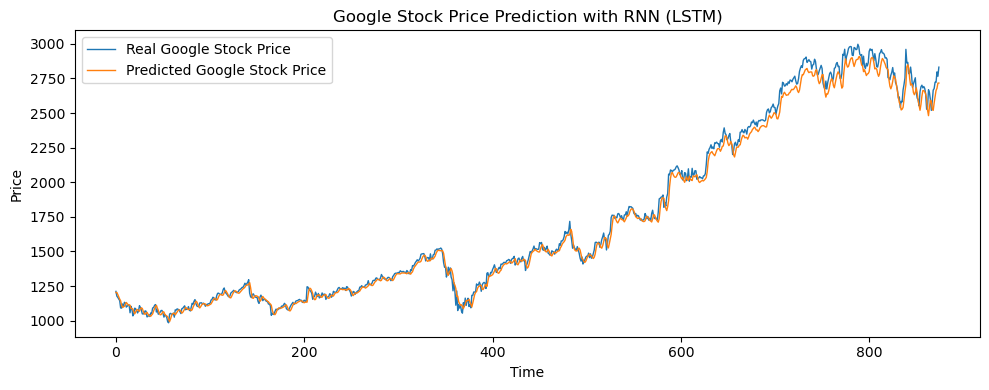

In [9]:
plt.figure(figsize=(10, 4))  # Smaller graph
plt.plot(real_prices, label='Real Google Stock Price', linewidth=1)
plt.plot(predicted_prices, label='Predicted Google Stock Price', linewidth=1)
plt.title('Google Stock Price Prediction with RNN (LSTM)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()
